In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import  Holt
import calendar
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
path = 'airPassengers.txt'

In [3]:
df = pd.read_csv(path, delimiter='\t')


In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.sample(19)     #date:1949 to 1960

,Month,#Passengers
95,1956-12,306
33,1951-10,162
70,1954-11,203
4,1949-05,121
74,1955-03,267
83,1955-12,278
29,1951-06,178
143,1960-12,432
26,1951-03,178
89,1956-06,374


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


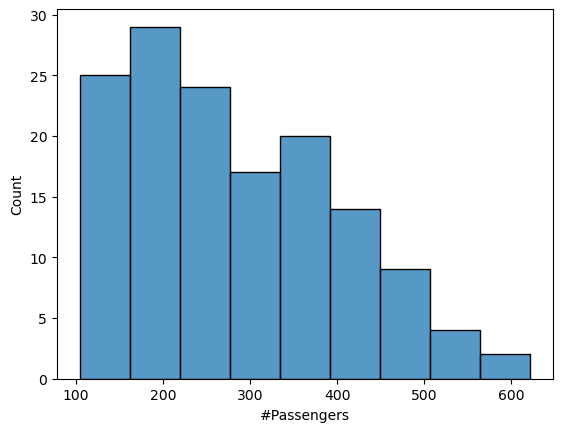

In [8]:
sns.histplot(data=df, x='#Passengers');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


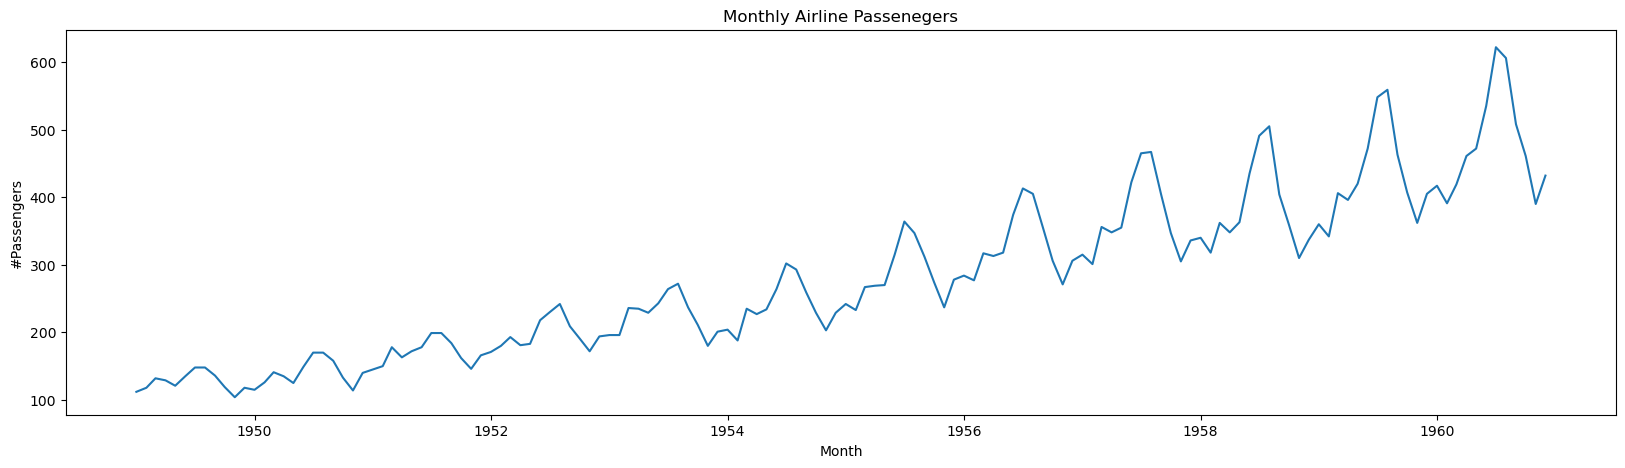

In [9]:
df['Month'] = pd.to_datetime(df['Month'])
plt.figure(figsize=(20, 5));
sns.lineplot(data=df, x='Month', y='#Passengers');
plt.title('Monthly Airline Passenegers');

In [10]:
new_df = df.copy()

In [11]:
new_df['Month'] = pd.to_datetime(new_df['Month'])
new_df.rename(columns = {'Month':'Date'}, inplace = True)
new_df['Month'] = new_df['Date'].dt.month
new_df['Year'] = new_df['Date'].dt.year

In [12]:
# Show month abbreviation
new_df['Month'] = [calendar.month_abbr[ind] for ind in new_df['Month']]

In [13]:
new_df.head()

,Date,#Passengers,Month,Year
0,1949-01-01,112,Jan,1949
1,1949-02-01,118,Feb,1949
2,1949-03-01,132,Mar,1949
3,1949-04-01,129,Apr,1949
4,1949-05-01,121,May,1949


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


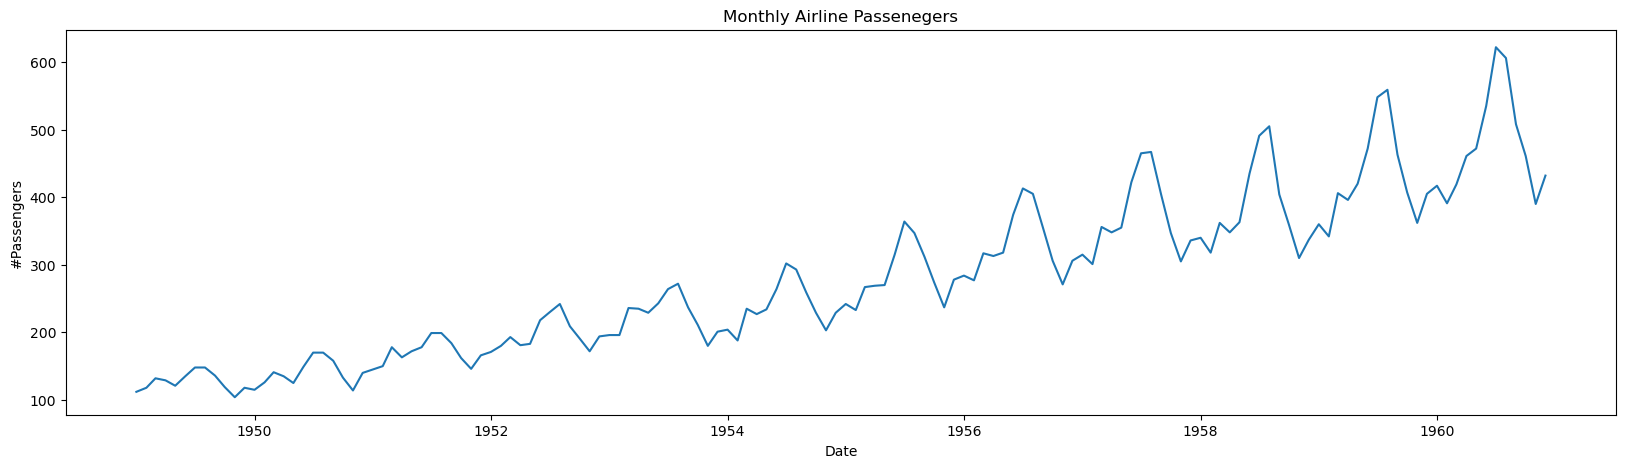

In [14]:
plt.figure(figsize=(20, 5));
sns.lineplot(data=new_df, x='Date', y='#Passengers');
plt.title('Monthly Airline Passenegers');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


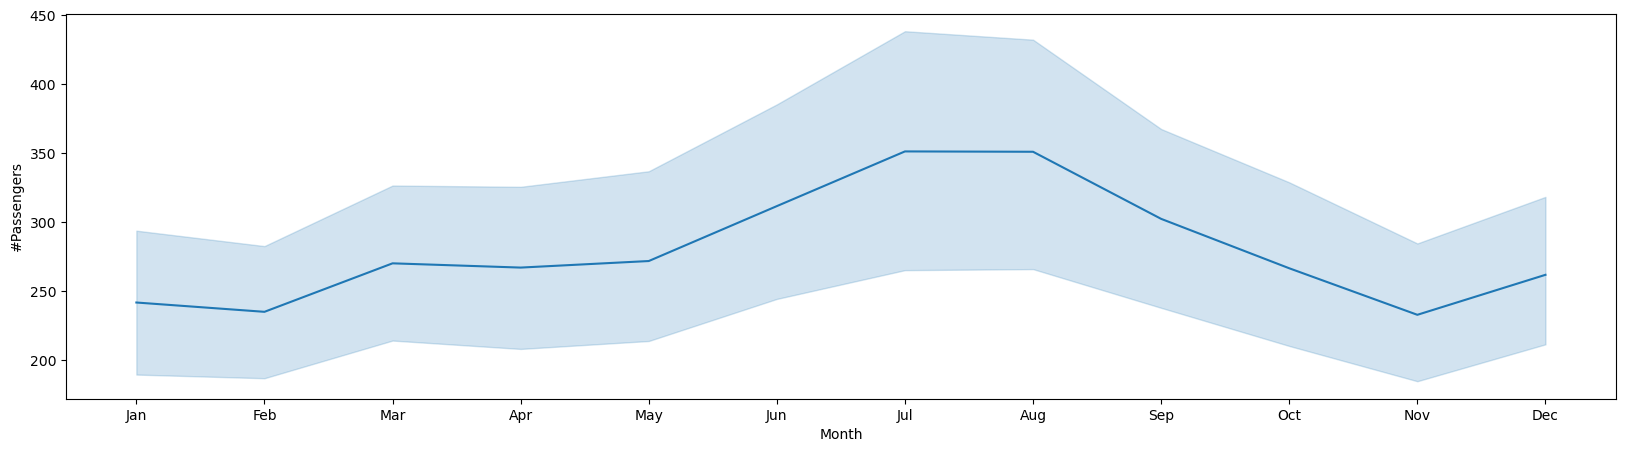

In [15]:
plt.figure(figsize=(20, 5));
sns.lineplot(data=new_df, x='Month', y='#Passengers');

* We can see that <b>July</b> and <b>August</b> have the highest numbers of passengers, while <b>February</b> and <b>November</b> have the lowest number of passengers.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


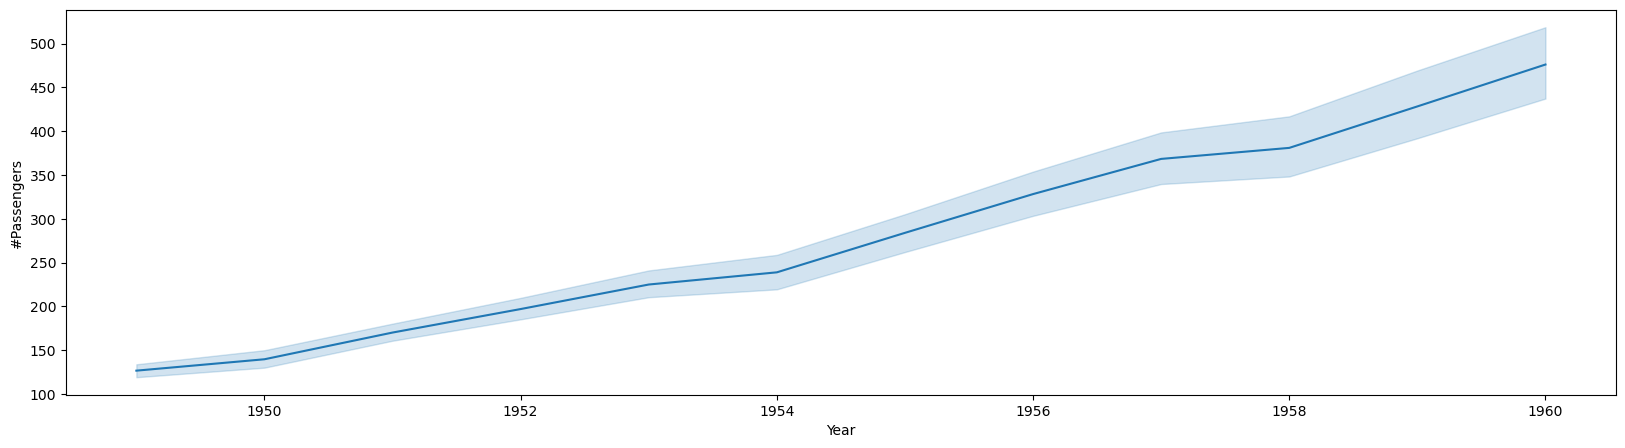

In [16]:
plt.figure(figsize=(20, 5));
sns.lineplot(data=new_df, x='Year', y='#Passengers');

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
def evaluate_model(actual_y, predicted_y, model):
  error = np.sqrt(mean_squared_error(actual_y, predicted_y))
  print(f"RMSE for {model} is {error}")
  return error

In [19]:
def data_split(percentage, data):
  train_size = int(data.shape[0] * percentage)
  train_df, test_df = data.iloc[:train_size,:], data.iloc[train_size:,:]
  return train_df, test_df

In [20]:
from sklearn.model_selection import TimeSeriesSplit

In [21]:
def k_folds(data, n_splits = 5):
  tscv = TimeSeriesSplit(n_splits)
  for i, (train_index, test_index) in enumerate(tscv.split(data)):
      train = data.iloc[train_index]
      test = data.iloc[test_index]
      yield train, test

In [22]:
def roll_forward(air_passengers, window_size = 30, split_percent = 0.8):
  m = len(air_passengers)
  for k in range(0, m, window_size):
    df = air_passengers.iloc[k : k+window_size]
    train_df, test_df = data_split(split_percent, df)
    yield train_df, test_df

In [23]:
# Decompose the time series
result = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
trend = result.trend
seasonal = result.seasonal
residual = result.resid


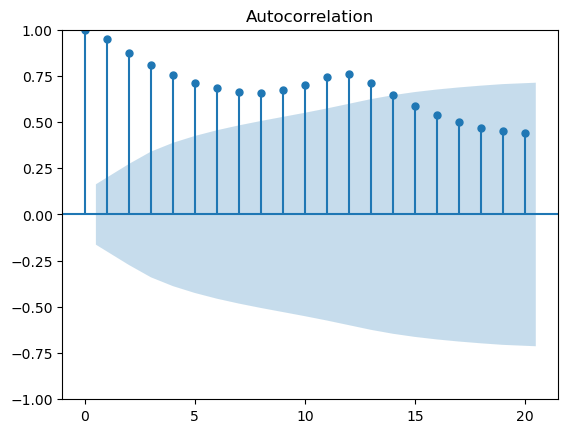

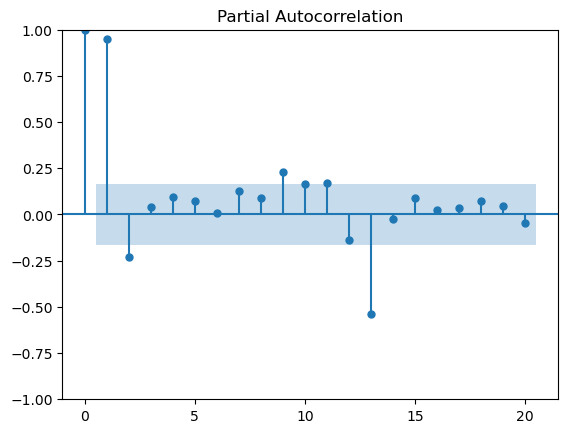

In [24]:
# Select ARIMA parameters
# We'll use ACF and PACF plots to determine the values of p, d, and q parameters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['#Passengers'], lags=20)
plt.show()

plot_pacf(df['#Passengers'], lags=20)
plt.show()


In [25]:
# Based on ACF and PACF plots, let's assume p=1, d=1, and q=1
p, d, q = 1, 1, 1

In [26]:
# Fit the ARIMA model
arima_model = ARIMA(df['#Passengers'], order=(p, d, q))
fitted_model = arima_model.fit()


In [27]:
# Validate the model
predicted_values = fitted_model.predict(start=1, end=len(df), typ='levels')
rmse = evaluate_model(df['#Passengers'], predicted_values, 'ARIMA')

RMSE for ARIMA is 13.483310226470834


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [28]:
# Make forecasts
# For demonstration, let's forecast the next 12 months
forecast = fitted_model.forecast(steps=15)
print("Forecasted values for the next 15 months:")
print(forecast)

Forecasted values for the next 15 months:
144    475.735059
145    454.996073
146    464.830415
147    460.167010
148    462.378378
149    461.329756
150    461.827008
151    461.591213
152    461.703026
153    461.650005
154    461.675148
155    461.663225
156    461.668879
157    461.666198
158    461.667469
Name: predicted_mean, dtype: float64
